In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Attempt to read the CSV file with ISO-8859-1 encoding
file_path = '/content/Summer-Olympic-medals-1976-to-2008.csv'
olympics_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to inspect the data
print(olympics_data.head())


       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [ ]:
#Display all columns
olympics_data.columns.tolist()

['City',
 'Year',
 'Sport',
 'Discipline',
 'Event',
 'Athlete',
 'Gender',
 'Country_Code',
 'Country',
 'Event_gender',
 'Medal']

In [ ]:
olympics_data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [ ]:
# Check for missing values in the dataset
missing_values = olympics_data.isnull().sum()
print(missing_values)


City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


Handling missing Values


In [ ]:
# Remove rows with missing values
olympics_data = olympics_data.dropna()

Correct Data Inconsistencies

In [ ]:
# Convert the Year column to integer
olympics_data['Year'] = olympics_data['Year'].astype(int)


Transform Data into Appropriate Formats

In [ ]:
# Convert all text columns to lowercase for consistency
text_columns = ['City', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country', 'Event_gender', 'Medal']
for column in text_columns:
    olympics_data[column] = olympics_data[column].str.lower()


In [ ]:
# Save the cleaned data to a new CSV file
olympics_data.to_csv('Summer-Olympic-medals-cleaned.csv', index=False)


**Exploratory Data Analysis (EDA)**

Understand the Distribution of Medals:


In [ ]:
# Count of medals by type
medal_counts = olympics_data['Medal'].value_counts()
print(medal_counts)

Medal
bronze    5258
gold      5042
silver    5016
Name: count, dtype: int64


In [ ]:
# Calculate the total number of medals for each year
medals_per_year = olympics_data.groupby('Year')['Medal'].count().reset_index()

# Rename columns for clarity
medals_per_year.columns = ['Year', 'Total_Medals']

# Display the total number of medals per year
print(medals_per_year)


   Year  Total_Medals
0  1976          1305
1  1980          1387
2  1984          1459
3  1988          1546
4  1992          1705
5  1996          1859
6  2000          2015
7  2004          1998
8  2008          2042


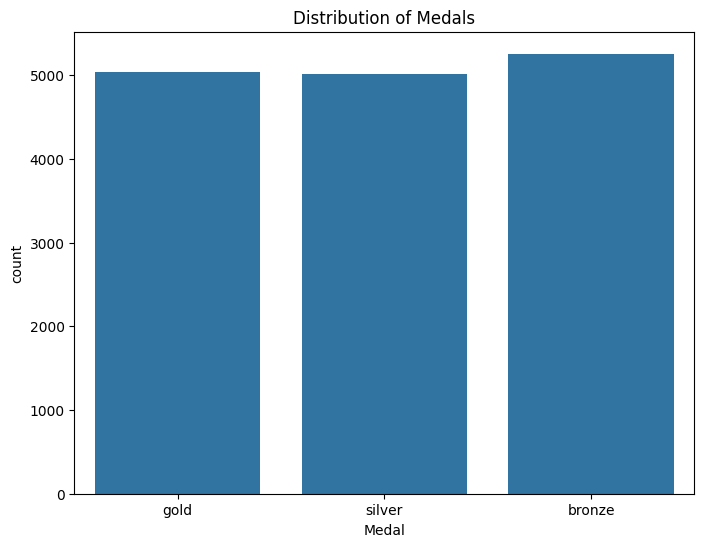

In [ ]:
# Plot the distribution of medals
plt.figure(figsize=(8, 6))
sns.countplot(data=olympics_data, x='Medal', order=['gold', 'silver', 'bronze'])
plt.title('Distribution of Medals')
plt.show()

Number of Participating Nations

In [ ]:
#Count of unique countries that participated each year.
participating_nations = olympics_data.groupby('Year')['Country'].nunique()
print(participating_nations)


Year
1976    41
1980    36
1984    47
1988    52
1992    64
1996    79
2000    80
2004    74
2008    86
Name: Country, dtype: int64


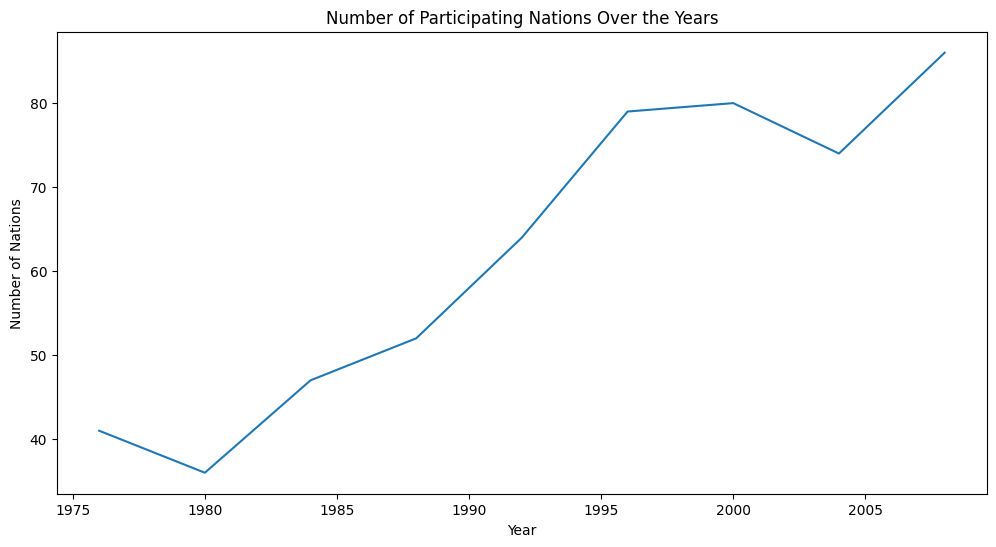

In [ ]:
# Plot the number of participating nations over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=participating_nations.index, y=participating_nations.values)
plt.title('Number of Participating Nations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Nations')
plt.show()

In [ ]:
# Total medals won each year
medals_per_year = olympics_data_cleaned.groupby('Year')['Medal'].count()
print(medals_per_year)

Year
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
Name: Medal, dtype: int64


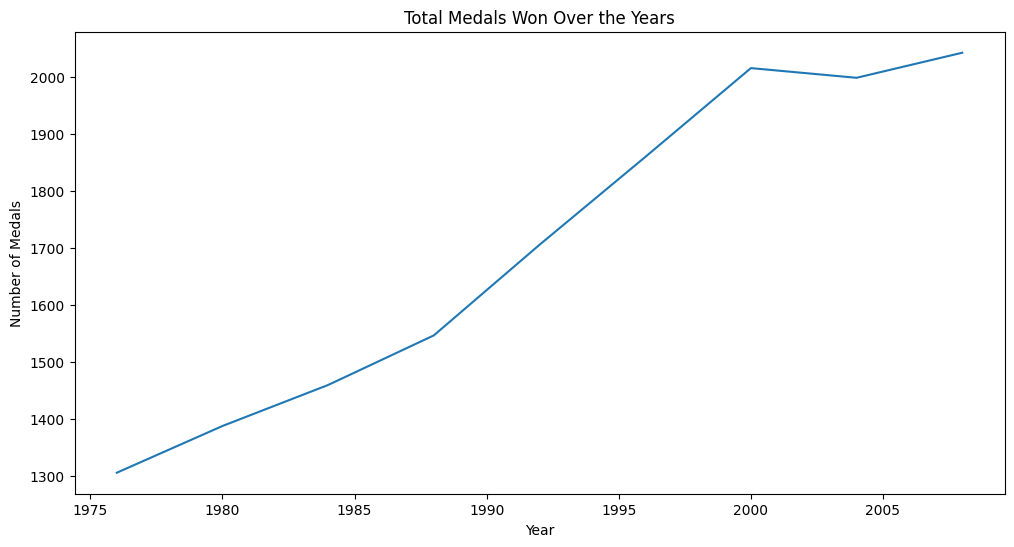

In [ ]:
# Plot total medals won over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=medals_per_year.index, y=medals_per_year.values)
plt.title('Total Medals Won Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

In [ ]:
# Top 10 countries with the most medals
top_countries = olympics_data_cleaned['Country'].value_counts().head(10)
print(top_countries)

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64


<ipython-input-30-3972b244a694>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


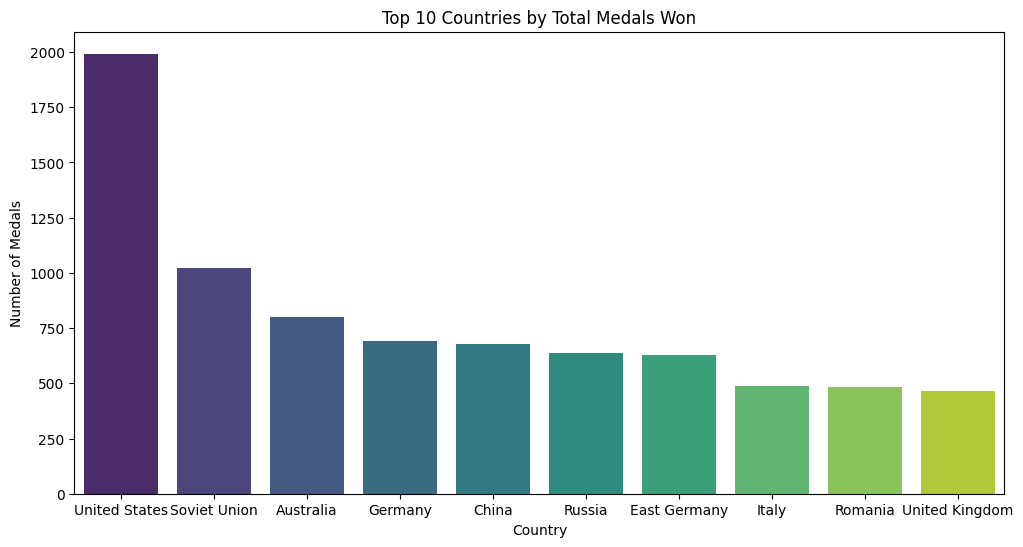

In [ ]:
# Plot the medals won by top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Total Medals Won')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

# **Country-Level Performance Analysis**

Performance of Countries Over the Years:

In [ ]:
# Total medals won by each country over the years
medals_by_country = olympics_data.groupby('Country')['Medal'].count().sort_values(ascending=False)
print(medals_by_country)

Country
united states    1992
soviet union     1021
australia         798
germany           691
china             679
                 ... 
panama              1
senegal             1
sri lanka           1
sudan               1
macedonia           1
Name: Medal, Length: 127, dtype: int64


<ipython-input-33-7a5cf78d46f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='coolwarm')


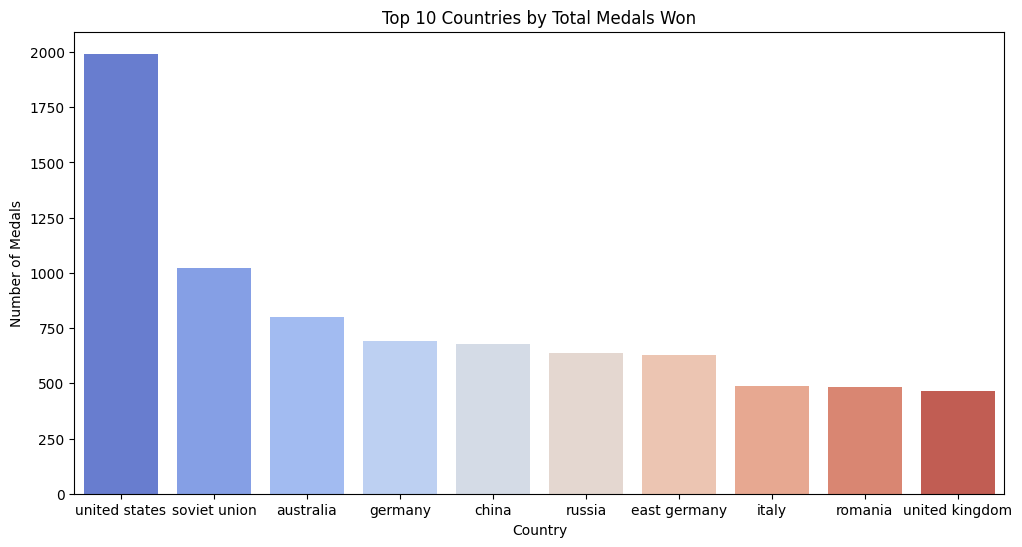

In [ ]:
# Plot the total medals won by top 10 countries
top_10_countries = medals_by_country.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='coolwarm')
plt.title('Top 10 Countries by Total Medals Won')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

Most Successful Countries Over the Years

In [ ]:
# Create a pivot table to see medals won by each country each year
medals_pivot = olympics_data.pivot_table(index='Year', columns='Country', values='Medal', aggfunc='count', fill_value=0)

# Top countries over time
top_countries_over_time = medals_pivot[top_10_countries.index]


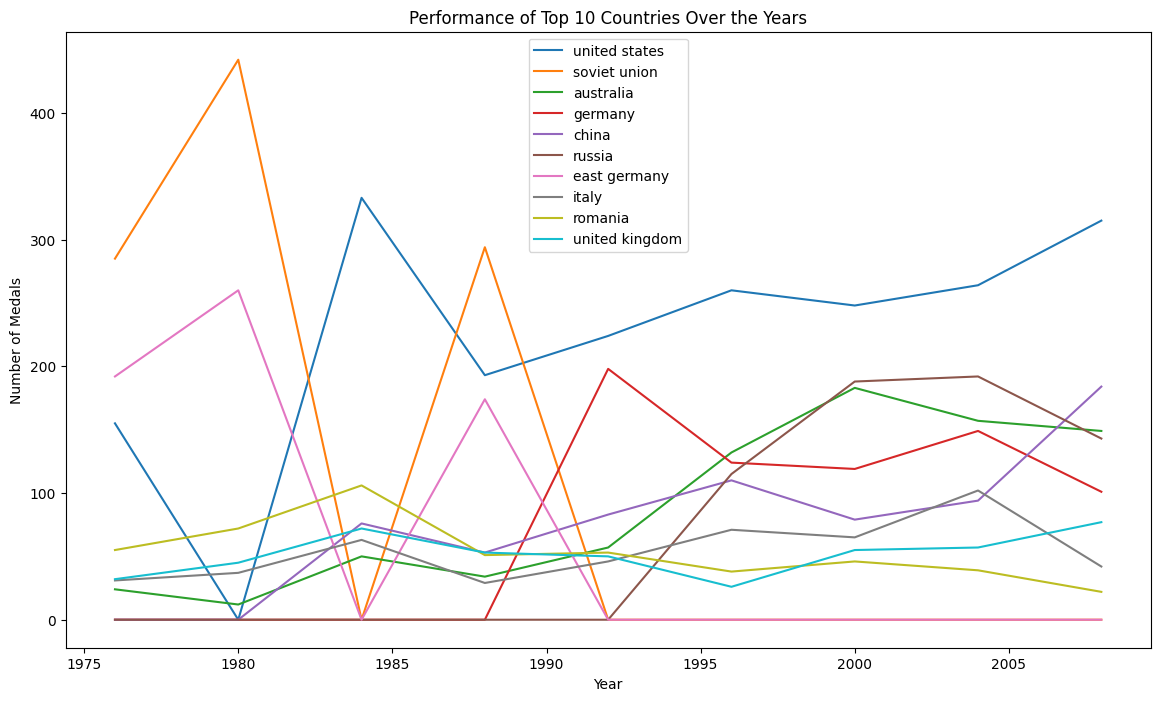

In [ ]:
# Plot the performance of top 10 countries over the years
plt.figure(figsize=(14, 8))
for country in top_countries_over_time.columns:
    plt.plot(top_countries_over_time.index, top_countries_over_time[country], label=country)
plt.title('Performance of Top 10 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.show()

Athlete Performance Metrics

In [ ]:
# Top 10 athletes with the most medals
top_athletes = olympics_data['Athlete'].value_counts().head(10)
print(top_athletes)

Athlete
phelps, michael           16
torres, dara              12
thompson, jenny           12
fischer, birgit           12
andrianov, nikolay        12
nemov, alexei             12
coughlin, natalie         11
biondi, matthew           11
van almsick, franziska    10
lewis, carl               10
Name: count, dtype: int64


<ipython-input-38-389bc9df8edc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.index, y=top_athletes.values, palette='viridis')


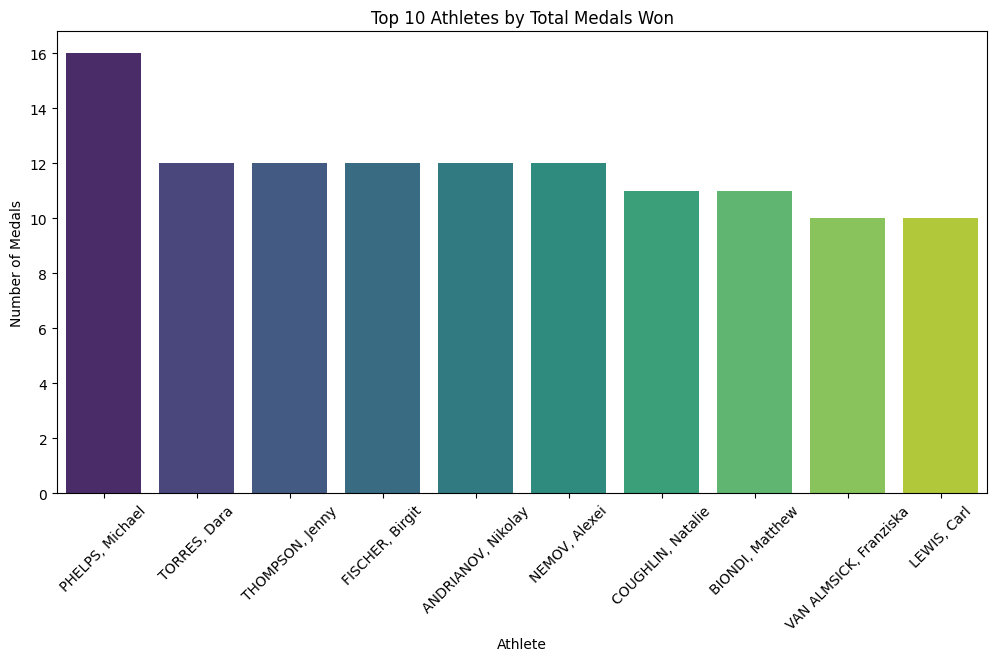

In [ ]:
# Plot the medals won by top 10 athletes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_athletes.index, y=top_athletes.values, palette='viridis')
plt.title('Top 10 Athletes by Total Medals Won')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Medals won by gender
medals_by_gender = olympics_data['Gender'].value_counts()
print(medals_by_gender)

Gender
men      9388
women    5928
Name: count, dtype: int64


<ipython-input-42-242666a87743>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=olympics_data, x='Gender', palette='pastel')


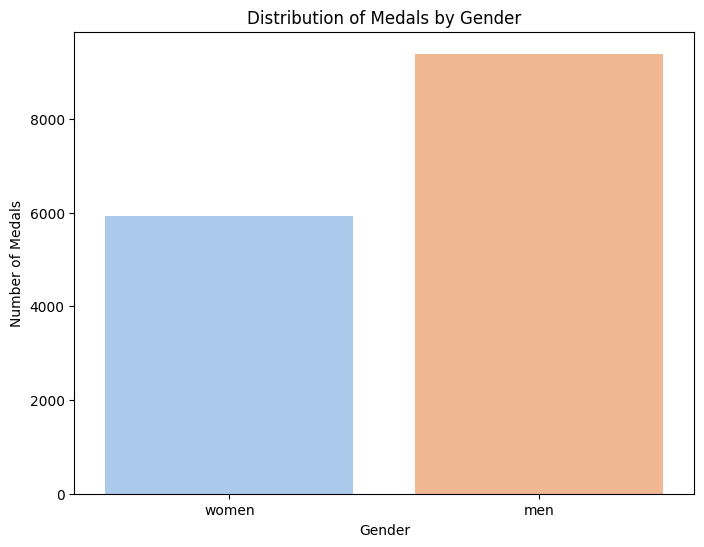

In [ ]:
# Plot the medals won by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=olympics_data, x='Gender', palette='pastel')
plt.title('Distribution of Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()


Analyze Performance by Age

In [ ]:
if 'Age' in olympics_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=olympics_data, x='Age', bins=15, kde=True)
    plt.title('Distribution of Medals by Age')
    plt.xlabel('Age')
    plt.ylabel('Number of Medals')
    plt.show()

**Sport and Event-Specific Trends**

Trends in Individual Sports

In [ ]:
# Total medals won in each sport
medals_by_sport = olympics_data['Sport'].value_counts().head(10)
print(medals_by_sport)

Sport
aquatics         2210
athletics        1523
rowing           1377
hockey            817
gymnastics        783
handball          780
volleyball        695
canoe / kayak     672
football          669
basketball        646
Name: count, dtype: int64


<ipython-input-46-2808648c5f91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_sport.index, y=medals_by_sport.values, palette='muted')


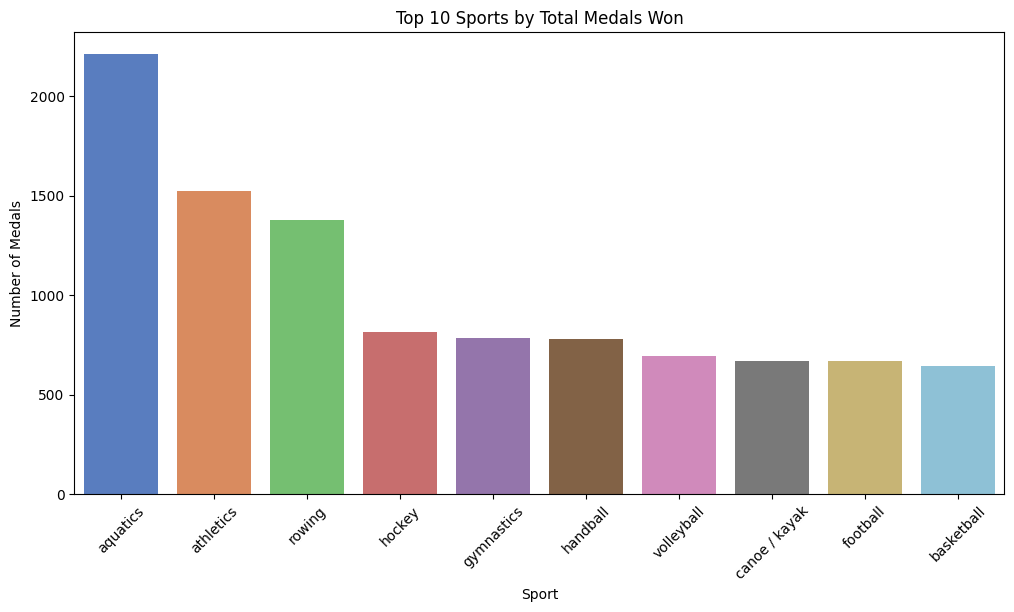

In [ ]:
# Plot the medals won by top 10 sports
plt.figure(figsize=(12, 6))
sns.barplot(x=medals_by_sport.index, y=medals_by_sport.values, palette='muted')
plt.title('Top 10 Sports by Total Medals Won')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

Dominant Nations in Each Sport

In [ ]:
olympics_data['Sport'].unique()

array(['aquatics', 'archery', 'athletics', 'basketball', 'boxing',
       'canoe / kayak', 'cycling', 'equestrian', 'fencing', 'football',
       'gymnastics', 'handball', 'hockey', 'judo', 'modern pentathlon',
       'rowing', 'sailing', 'shooting', 'volleyball', 'weightlifting',
       'wrestling', 'table tennis', 'tennis', 'badminton', 'baseball',
       'softball', 'taekwondo', 'triathlon'], dtype=object)

In [ ]:
# Example for a specific sport, say Athletics
athletics_data = olympics_data[olympics_data['Sport'] == 'athletics']
medals_by_country_in_athletics = athletics_data['Country'].value_counts().head(10)
print(medals_by_country_in_athletics)

Country
united states     299
soviet union      115
east germany      107
united kingdom     92
jamaica            88
russia             83
kenya              53
cuba               41
nigeria            40
west germany       36
Name: count, dtype: int64


In [ ]:
aquatics_data = olympics_data[olympics_data['Sport'] == 'aquatics']
medals_by_country_in_aquatics = aquatics_data['Country'].value_counts().head(10)
print(medals_by_country_in_aquatics)

Country
united states    578
australia        239
russia           125
china            118
east germany     109
germany          100
hungary           92
soviet union      91
canada            89
netherlands       83
Name: count, dtype: int64


<ipython-input-22-26aab266b1e5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




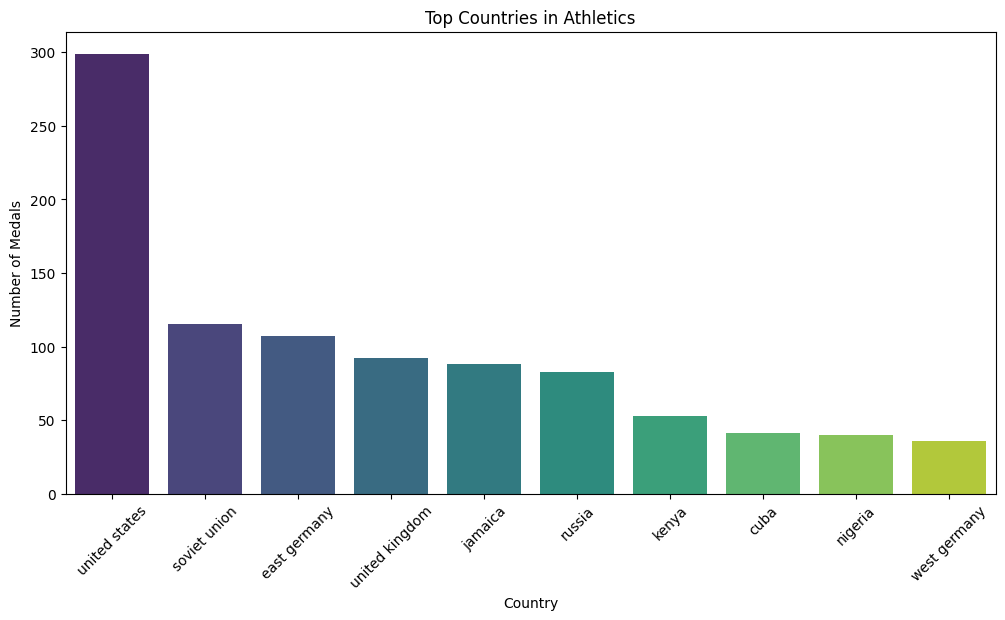

In [ ]:
# Plot the top countries in Athletics
plt.figure(figsize=(12, 6))
sns.barplot(x=medals_by_country_in_athletics.index, y=medals_by_country_in_athletics.values, palette='viridis')
plt.title('Top Countries in Athletics')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by Country and Sport, then count the number of medals
medals_count = olympics_data.groupby(['Country', 'Sport']).size().reset_index(name='Medal_Count')

# Find the country with the maximum number of medals for each sport
dominant_countries = medals_count.loc[medals_count.groupby('Sport')['Medal_Count'].idxmax()]

# Sort by Country
dominant_countries_sorted = dominant_countries.sort_values(by='Country')

# Display the result
dominant_countries_sorted

,Country,Sport,Medal_Count
35,australia,triathlon,4
24,australia,cycling,54
32,australia,softball,60
82,brazil,volleyball,102
78,brazil,football,109
139,china,table tennis,61
137,china,shooting,42
124,china,badminton,47
143,china,weightlifting,43
165,cuba,baseball,111


In [ ]:
import plotly.express as px

# Plot the data
fig = px.bar(dominant_countries_sorted, x='Sport', y='Medal_Count', color='Country', title='Dominant Country by Sport')
fig.show()

**Impact of Geopolitical Events**

In [ ]:
#the 1980 and 1984 boycotts
boycott_years = [1980, 1984]
data_boycott_years = olympics_data[olympics_data['Year'].isin(boycott_years)]

# Number of participating nations during boycott years
participating_nations_boycott = data_boycott_years.groupby('Year')['Country'].nunique()
print(participating_nations_boycott)

Year
1980    36
1984    47
Name: Country, dtype: int64


<ipython-input-53-dcafd1a09ae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participating_nations_boycott.index, y=participating_nations_boycott.values, palette='coolwarm')


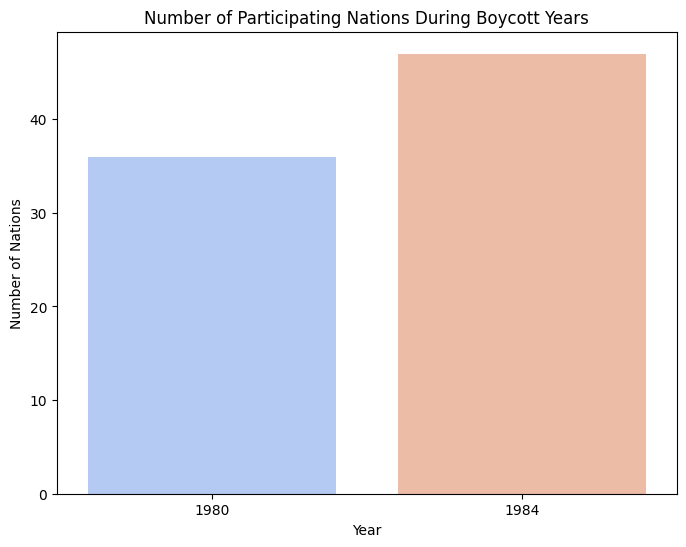

In [ ]:
# Plot the number of participating nations during boycott years
plt.figure(figsize=(8, 6))
sns.barplot(x=participating_nations_boycott.index, y=participating_nations_boycott.values, palette='coolwarm')
plt.title('Number of Participating Nations During Boycott Years')
plt.xlabel('Year')
plt.ylabel('Number of Nations')
plt.show()

Return or Debut of Nation

In [ ]:
# Analyzing the performance of nations returning or debuting
debut_nations = olympics_data.groupby('Country')['Year'].min().sort_values().head(10)
print(debut_nations)

Country
trinidad and tobago    1976
norway                 1976
czechoslovakia         1976
denmark                1976
new zealand            1976
netherlands            1976
east germany           1976
mongolia               1976
mexico                 1976
cuba                   1976
Name: Year, dtype: int64


<ipython-input-55-2374a90c643d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=debut_nations.index, y=debut_nations.values, palette='muted')


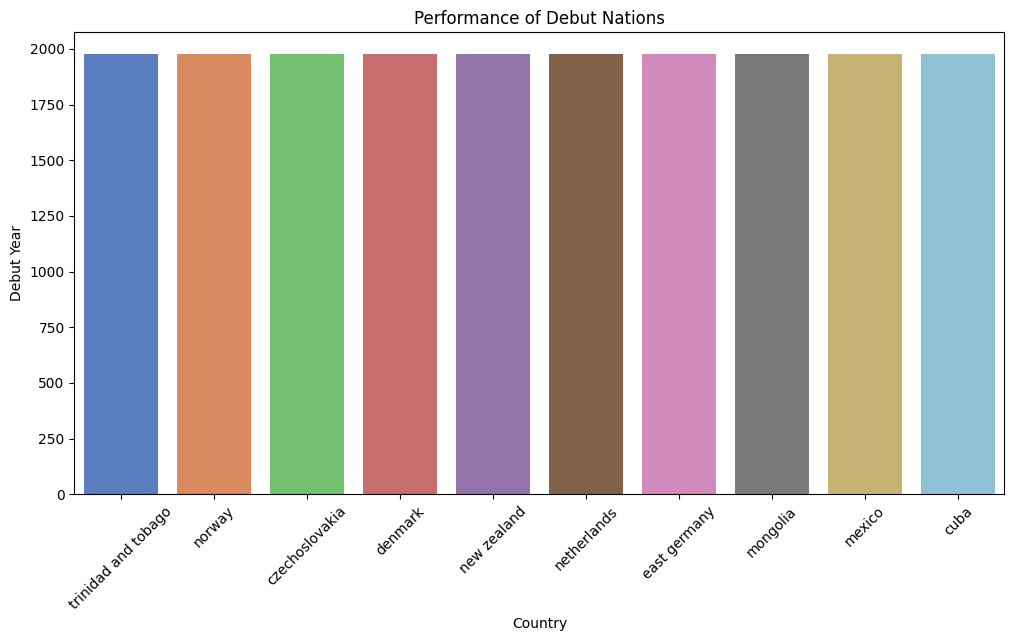

In [ ]:
# Plot the performance of debut nations
plt.figure(figsize=(12, 6))
sns.barplot(x=debut_nations.index, y=debut_nations.values, palette='muted')
plt.title('Performance of Debut Nations')
plt.xlabel('Country')
plt.ylabel('Debut Year')
plt.xticks(rotation=45)
plt.show()

**Predictive Analysis for Future Olympics**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
medals_per_year = olympics_data.groupby('Year')['Medal'].count().reset_index()
X = medals_per_year[['Year']]
y = medals_per_year['Medal']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future medals for the next Olympics (e.g., 2024)
future_years = np.array([[2024], [2028], [2032]])
future_medals = model.predict(future_years)

# Print the predictions
for year, medals in zip(future_years.flatten(), future_medals):
    print(f"Predicted medals for {year}: {medals}")


Predicted medals for 2024: 2529.244444444448
Predicted medals for 2028: 2632.6777777777825
Predicted medals for 2032: 2736.1111111111168


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Data Visualization and Reporting**

Interactive Plot of Medals Over the Years

In [ ]:
import plotly.express as px

# Prepare the data for interactive plot
medals_per_year = olympics_data.groupby('Year')['Medal'].count().reset_index()

# Create an interactive line plot
fig = px.line(medals_per_year, x='Year', y='Medal', title='Total Medals Won Over the Years')
fig.show()


Interactive Plot of Top Countries by Total Medals Won

In [ ]:
# Prepare the data for top 10 countries
top_10_countries = olympics_data['Country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['Country', 'Medal']

# Create an interactive bar plot
fig = px.bar(top_10_countries, x='Country', y='Medal', title='Top 10 Countries by Total Medals Won')
fig.show()


Interactive Plot of Medals by Sport

In [ ]:
# Prepare the data for top 10 sports
medals_by_sport = olympics_data['Sport'].value_counts().head(10).reset_index()
medals_by_sport.columns = ['Sport', 'Medal']

# Create an interactive bar plot
fig = px.bar(medals_by_sport, x='Sport', y='Medal', title='Top 10 Sports by Total Medals Won')
fig.show()


In [ ]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

<ipython-input-62-b384b6653dc2>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-62-b384b6653dc2>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)

In [ ]:
# Define the layout of the app
app.layout = html.Div([
    html.H1('Summer Olympics Medals Dashboard'),
    dcc.Graph(id='medals-over-years'),
    dcc.Graph(id='top-countries'),
    dcc.Graph(id='medals-by-sport')
])

In [ ]:
@app.callback(
    [Output('medals-over-years', 'figure'),
     Output('top-countries', 'figure'),
     Output('medals-by-sport', 'figure')]

SyntaxError: incomplete input (<ipython-input-66-a5fa7eb5eb4e>, line 4)